# Zero-Phase Zero-Padding

In signal processing, applying a window to a sinusoidal signal and analyzing its spectrum via the FFT is a common practice. However, to obtain a more accurate approximation of the continuous-time Fourier Transform (CTFT), we often **zero-pad** the signal. Furthermore, **zero-phase padding** improves the spectral resolution by centering the time-domain window around zero time.

This notebook shows how to:
- Generate a finite sinusoid
- Apply a Blackman window
- Perform zero-phase zero-padding
- Observe the spectral effects


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal.windows import blackman
from dsp.signals.fm import cfsig

sns.set_style("whitegrid")

## Create the Real-Valued Sinusoid

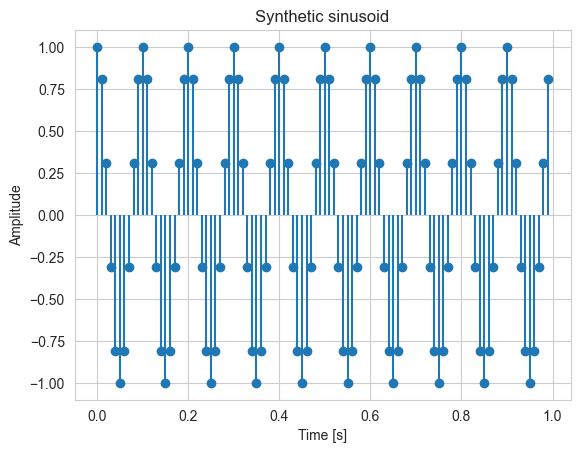

In [3]:
fs = 100        # Sampling frequency
ds = 1 / fs     # Sampling period
dur = 1         # Duration in seconds
t = np.arange(0, dur, ds)

# Generate sinusoid
x = np.real(cfsig(t, 10))

plt.stem(t, x, basefmt=" ")
plt.title('Synthetic sinusoid')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## Create and Visualize the Blackman Window

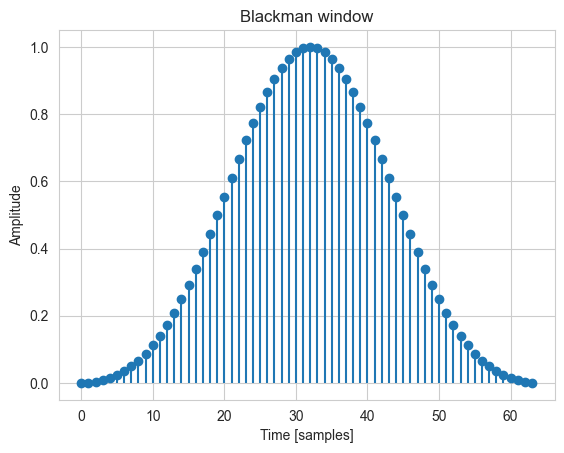

In [4]:
M = 64  # Window length
n = np.arange(0, M)
wb = blackman(M, sym= False)

plt.stem(wb, basefmt=" ")
plt.title('Blackman window')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## Apply the Window to the Sinusoid

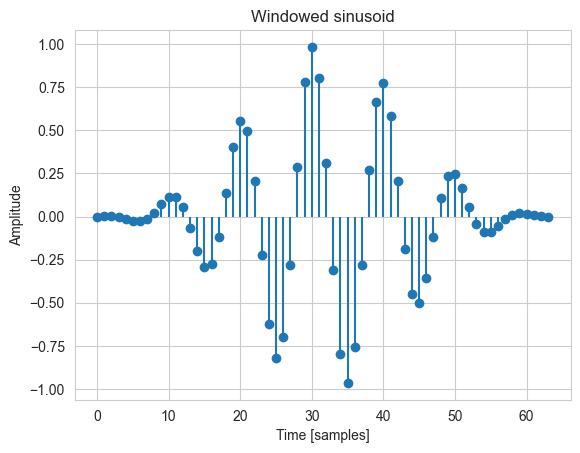

In [5]:
xw = wb * x[:M]

plt.stem(xw, basefmt=" ")
plt.title('Windowed sinusoid')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## Form Zero-Phase Padded Signal

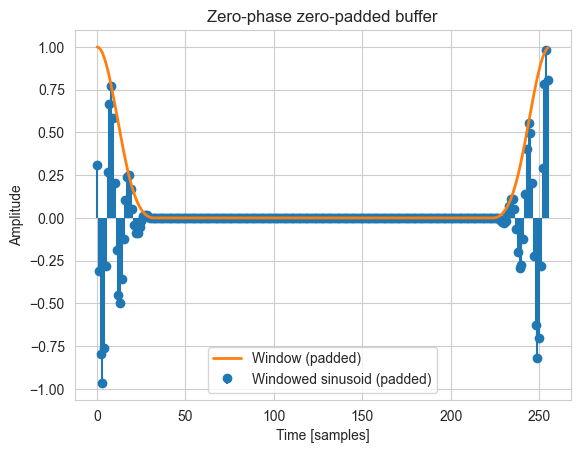

In [6]:
Modd = M % 2
Mo2 = (M - Modd) // 2
nfft = 2 ** int(np.ceil(np.log2(M * 4)))

xwzp = np.concatenate([xw[Mo2:], np.zeros(nfft - M), xw[:Mo2]])
wzp = np.concatenate([wb[Mo2:], np.zeros(nfft - M), wb[:Mo2]])

plt.stem(xwzp, linefmt='C0-', markerfmt='C0o', basefmt=" ", label='Windowed sinusoid (padded)')
plt.plot(wzp, 'C1', label='Window (padded)', linewidth=2)
plt.title('Zero-phase zero-padded buffer')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


## Compute and Plot the FFT Magnitude (in dB)

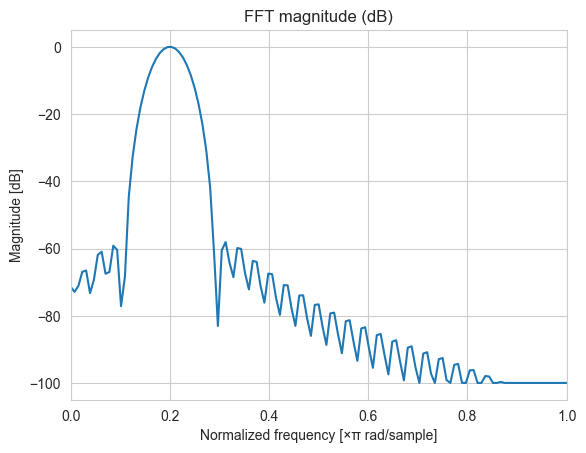

In [7]:
Xwzp = np.fft.fft(xwzp)
magXw = 20 * np.log10(np.abs(Xwzp))
magXw -= np.max(magXw)
dBCut = -100
magXw = np.maximum(magXw, dBCut)

nf = np.linspace(0, 2, nfft, endpoint=False)

plt.plot(nf, magXw)
plt.title('FFT magnitude (dB)')
plt.xlabel('Normalized frequency [×π rad/sample]')
plt.ylabel('Magnitude [dB]')
plt.xlim([0, 1])
plt.grid(True)
plt.show()


### Conclusions

- **Zero-padding** increases the frequency resolution of the FFT without adding information, by interpolating the spectrum.
- **Zero-phase padding** symmetrically aligns the signal around time 0, preventing phase distortion and revealing true spectral leakage characteristics.
- The Blackman window offers excellent sidelobe suppression, and when applied with zero-padding, reveals the main lobe and spectral characteristics more clearly.
